# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

[Rubric](https://review.udacity.com/#!/rubrics/105/view)

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# Select three indices of your choice you wish to sample from the dataset
# indices = np.random.randint(data.shape[0], size=3)
# Selected using random function above, then hard-coded.
indices = [94, 435, 58]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5626,12220,11323,206,5038,244
1,29703,12051,16027,13135,182,2204
2,13779,1970,1648,596,227,436


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

1. Higher than 75th percentile purchases in Milk, Grocery and Detergents_Paper, lower purchases in other categories. The combination of Milk and Paper goods makes me think it could be a larger market or a cafe.
2. Almost all categories are over the 75th percentile: Fresh, Milk, Grocery, Frozen and Delicatessen. Detergents_Paper is below the 25th percentile, however. Maybe this is a grocery/market that stocks a wide variety of foods but doesn't deal in non-food goods.
3. Near the 75th percentile for the Fresh category, but well below the 50th for all the other cateogries. This customer purchases mostly from the Fresh category and not much else. It could be a produce stand of some sort, or possibly a restaurant.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
- Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

target_feature = 'Detergents_Paper'

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(target_feature, axis=1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data[target_feature], test_size=0.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

print("Feature Importances for the Decision Tree:")
display(zip(new_data.columns, regressor.feature_importances_))

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

Feature Importances for the Decision Tree:


[('Fresh', 0.030675525448849477),
 ('Milk', 0.026518404256752448),
 ('Grocery', 0.90405291345501293),
 ('Frozen', 0.015812755800548101),
 ('Delicatessen', 0.022940401038836933)]

0.72865518125414541

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

On a hunch I tried this out with the `"Detergents_Paper"` feature, it seemed more likely that this would be predictable based on some other categories, since a lot of things in this cateogory are sort of "auxillary items" that your business might use directly rather than re-sell, so they're more of fixed costs based on what else you're buying.

The reported prediction score is `0.7287`. This is a relatively high R2 score even with an un-optimized model. I also printed out the feature importances, which shows Grocery by far the most important feature for the prediction at 90.4%.

If we were going to implement feature selection, we could drop one of Detergents_Paper or Grocery without losing a lot of data, because of their high correlation.

Added after Question 5: If I'm using the terms correctly from the previous lectures, I believe this means Detergents_Paper is mostly "weakly relevant" in the sense that it can explain a lot of the variance in the data, but that same variance can be largely explained by Grocery as well. In other words, given a subset of features that doesn't contain Grocery, adding Detergents_Paper would significantly improve the Bayes Optimal Classifier, but in a subset of features that does contain Grocery, adding Detergents_Paper would not have nearly as much impact on improving the B.O.C.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

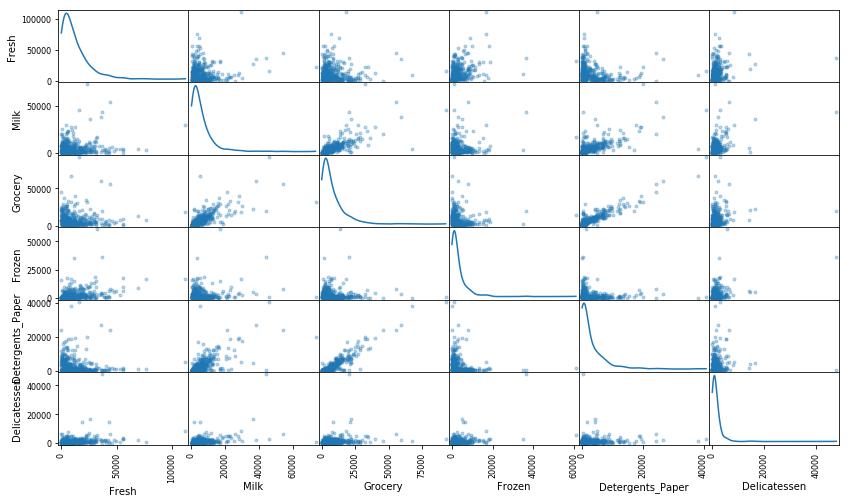

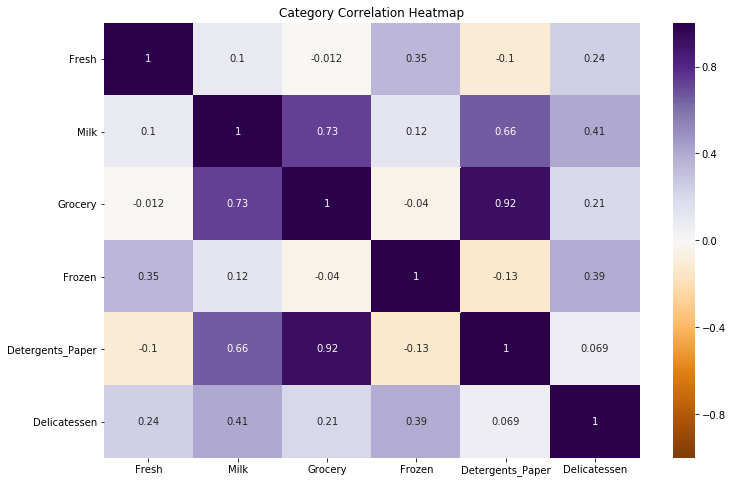

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Adding a heatmap as well
plt.figure(figsize=(12,8))
plt.title("Category Correlation Heatmap")
sns.heatmap(data.corr(), vmin=-1.0, vmax=1.0, cmap='PuOr', annot=True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Based on a visual inspection, the highest correlation seems to be between `Detergents_Paper + Grocery`, where the correlation falls close to a line with few outliers. To a much lesser extent, `Detergents_Paper + Milk` seem to have a linear correlation as well, and maybe `Milk + Grocery`.

This confirms my suspicion that `Detergents_Paper` is less relevant, as it can be derived pretty well from `Grocery` and `Milk` or perhaps even just `Grocery`.

At this resolution, the `Detergents_Paper` and `Grocery` features, like all the other features, have a similar distribution: positively skewed, with a very long tail to the right.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

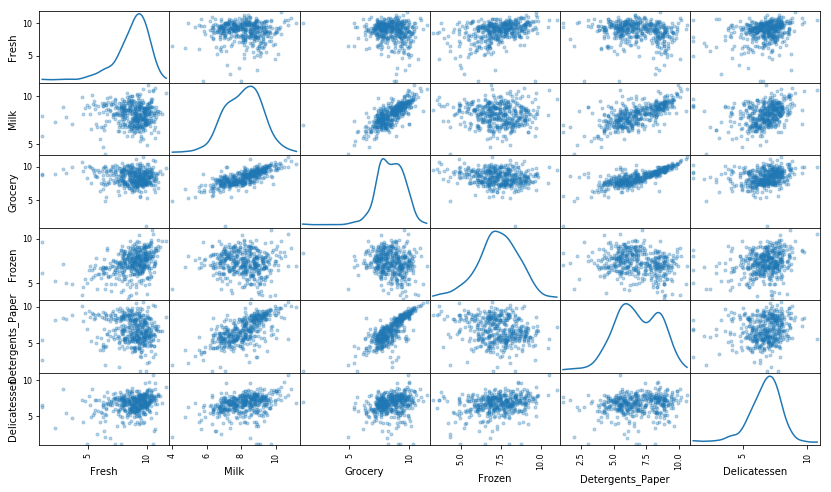

In [6]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.635154,9.410829,9.334591,5.327876,8.524764,5.497168
1,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
2,9.530901,7.585789,7.407318,6.390241,5.424950,6.077642


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
outlier_counts = np.zeros(log_data.shape[0])

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Non-outlier range for feature '{}': {:.2f} - {:.2f}".format(feature, Q1-step, Q3+step)
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_rows = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))
    display(log_data[outlier_rows])
    outlier_counts[outlier_rows] += 1

print "# of data points with at least one outlier feature: {}".format((outlier_counts > 0).sum())
print "data description post-scaling:"
display(log_data.describe())
print "Data points with more than one outlier feature:"
display(log_data[outlier_counts > 1])

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Data set has {} rows after removing outliers".format(good_data.shape[0])

Non-outlier range for feature 'Fresh': 5.51 - 12.27
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Non-outlier range for feature 'Milk': 5.02 - 11.20
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Non-outlier range for feature 'Grocery': 5.28 - 11.67
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Non-outlier range for feature 'Frozen': 4.26 - 10.53
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Non-outlier range for feature 'Detergents_Paper': 1.46 - 12.36
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Non-outlier range for feature 'Delicatessen': 3.77 - 9.75
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


# of data points with at least one outlier feature: 42
data description post-scaling:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


Data points with more than one outlier feature:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data set has 435 rows after removing outliers


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

I found a total of 42 rows with at least one outlier feature. Removing all 42 rows would remove almost 10% of the data, so I'm hesitant to remove them all.

I found 5 rows that are considered outliers for more than one feature, with row ids:

`[65, 66, 75, 128, 154]`

5 rows makes up roughly 1% of the data points. I've decided to remove these data points for a few reasons:

1. Outliers can cause many ML models to behave suboptimally. Below we will be implementing some clustering, and clustering in particular can be very sensitive to outliers. For instance, [k-means clustering is not stable](http://blog.geomblog.org/2011/06/clustering-with-outliers.html), meaning that adding a single outlier point can dramatically change the clusters that are computed. Worst case, k-means can actually [select the outlier as the center of one of the clutsers](https://stats.stackexchange.com/questions/214362/trouble-in-understanding-outliers-influence-on-k-means) in order to minimize the value of the loss function.
2. Our further analysis below mostly revolves around categorizing data points to find customer segments. As such, we are more interested in looking at large-scale tendencies and trends in the data, and we care less about analyzing individual unusual data points.
3. The PCA analysis that we perform next can be [quite sensitive to outliers](https://stats.stackexchange.com/questions/44226/adversarial-noise-in-pca/) as well.

Unfortunately, two of these removed rows were in my sample. Bad luck! I've gone back and re-done my sampling with other rows.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

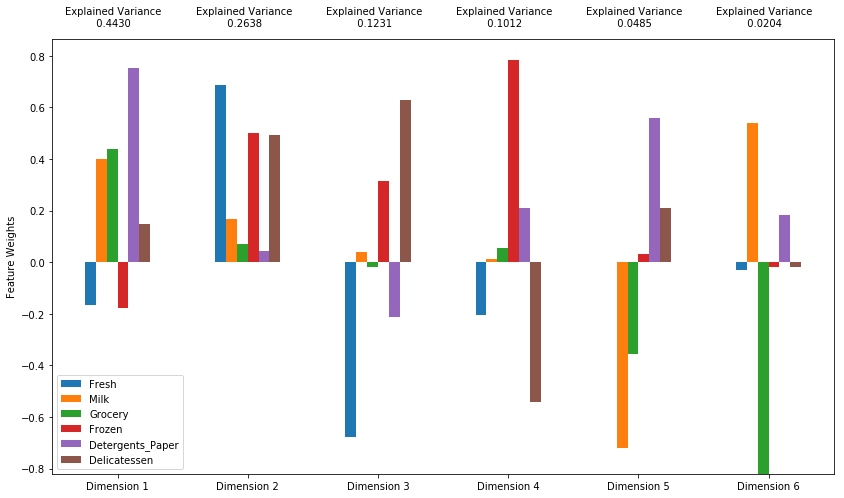

In [9]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first two components explain `0.443 + 0.2638 = 0.7068` or 70.68% of the total variance. The first four components explain 93.11% of the total variance.

The first component indicates that many customers tend to buy milk, grocery and detergents_paper together. These same customers also tend to buy less fresh and frozen. This matches with my earlier analysis of detergents_paper against these other features.

The second component indicates a set of customers who tend to buy fresh, frozen and delicatessen together. These customers are positively but much less strongly correlated with buying the other categories as well.

The third component shows a set of customers who buy frozen and a large amount of delicatessen together, but do _not_ buy fresh or detergents_paper.

The fourth component shows buying frozen and to a lesser extent detergents_paper, and not buying fresh or delicatessen.

If I had to guess, I might say the four components strongly correlate with four types of businesses:

1. Small markets, or cafes.
2. Restaurants.
3. A deli.
4. I'm not sure about this one. Maybe a dessert shop or vendor?

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.3931,-1.3317,-1.6233,-0.4653,-0.5867,0.3586
1,-0.6448,2.8583,0.6377,0.5879,-1.9515,-0.7170
2,-1.7655,-0.4717,-0.9100,-0.9091,-0.1604,0.3293


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [11]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.3931,-1.3317
1,-0.6448,2.8583
2,-1.7655,-0.4717


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

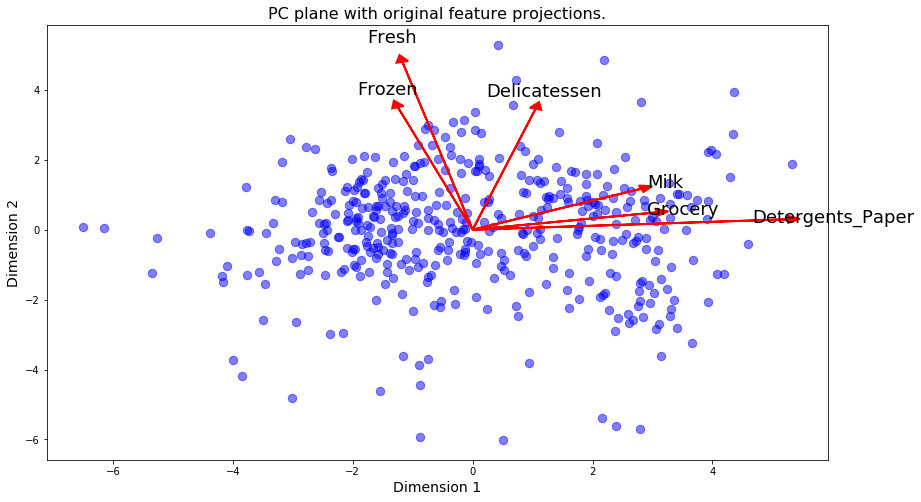

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

K-Means clustering is faster, and the results can be easier to interpret since they are a binary classification yes/no this data point is part of this cluster. K-Means will always converge to an answer, though it may find a different answer if you run it again.

On the other hand, a GMM better generalizes to find non-spherical clusterings. It also returns a probability for each clustering, rather than a binary answer, which is more difficult to interpret but depending on your data and use case, might allow you to do more with the results and cut down on mis-classifications. GMM can get stuck in local optima and not converge to a good final answer, but you can mitigate this by running it multiple times with differently randomized starting positions.

Sources: the course lectures, [sklearn documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.mixture.GMM.html#sklearn.mixture.GMM), and [this Quora question](https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian).

It could be useful to run GMM on this data, as we could get a probability for each clustering and inspect more closely any outliers that lie somewhere "in-between" two or more clusters. However, since we have already seen some indication that there are clear classes of customers in the data, I would like to run K-Means clustering on the data and see how clearly separated the clusterings are. I don't think we will see too many points "in between" different clusterings, since businesses tend to fall into specific distinct categories.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters = 2, random_state = 0).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
score

0.42628101546910835

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

| # Clusters | Silhouette Score |
| --- | ---: |
| 2 | 0.426 |
| 3 | 0.397 |
| 4 | 0.332 |
| 6 | 0.367 |
| 8 | 0.351 |

The highest score I saw was with just two clusters, with a score of `0.426`. There is then another local maxima around 6 clusters with a score of `0.367`.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

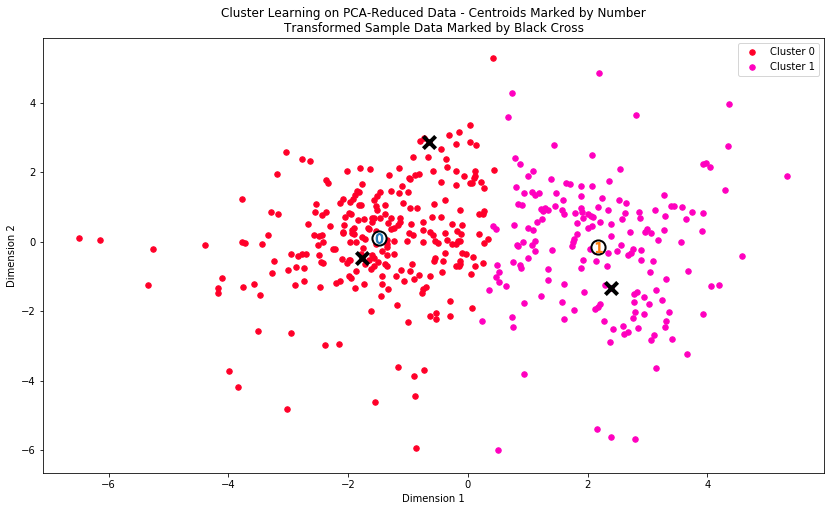

In [15]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


cluster centers in comparison to the whole-data medians:


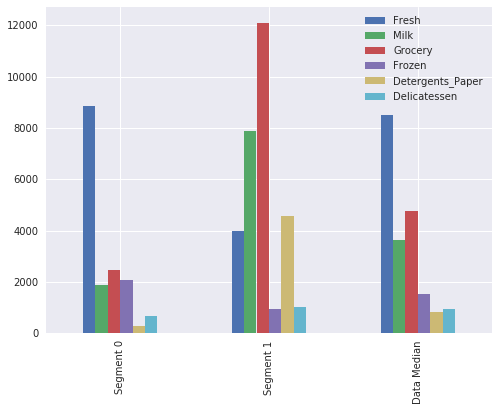

In [21]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print "cluster centers in comparison to the whole-data medians:"
plt.style.use('seaborn')
compare = true_centers.copy()
compare.loc['Data Median'] = data.median()
compare.plot(kind='bar', figsize=(8,6))
plt.show()

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

Segment 0 is over the 50th percentile for the Fresh and Frozen categories, lower in all others. None of my 3 samples exactly correlate with this, but it's closest to my 3rd sample which I originally predicted might be a produce stand or restaurant.

Segment 1 is over the 75th percentile for three categories: Milk, Grocery, and Detergents_Paper. Delicatessen is slightly above the median. The other categories are well below the median. This correlates strongly with the Detergents_Paper/Grocery segment and my 1st sample. I originally predicted this could be cafes or markets.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

1. This was my sample point high in Detergents_Paper and Grocery, which I did predict to be in this same cafe/market category.
2. This sample point is more ambiguous. I intially predicted a grocery or market that doesn't deal in frozen goods. This falls somewhere between the two clusters. This matches with the `cluster_results` scatterplot above, where this sample falls closer to the dividing line between the clusters.
3. This sample point lies squarley in cluster 0, fitting my original prediction of a produce stand or restaurant.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

I would recommend trying out the new, less frequent delivery service with a subset of customers in Segment 0 first. Because they buy less perishable goods and more frozen goods, it may be easier for them to adapt to less frequent deliveries.

If we want to A/B test across all customers, we could choose a subset of customers from each of Segments 0 and 1. We could then have a higher confidence that if either of those subsets responds positively, their segment as a whole is more likely to respond positively as well.

For very large customers, it may even make sense to deliver perishable categories 5 days a week, and non-perishables (Frozen, Detergents_Paper) 3 days a week. That would depend on delivery logistics though.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use `preds` (which is the customer segment engineered feature) as our new target feature, and train a new supervised classification learner to predict this based on the category spending features. Then, we can use this trained model to predict each new customer's segment based just on their estimated spending in each category.

We could use `clusterer` directly as well, but training this model would give us more flexibility in defining and refining the model, using other dimensions of the data, and also updating the model over time.

A simple example of how this could look, without optimization:

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(good_data, preds, test_size = 0.2, random_state = 0)
clf = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
display(clf.score(X_test, y_test))

display(clf.predict(np.log([[5626, 12220, 11323, 206, 5038, 244]]))[0])

0.97701149425287359

1

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

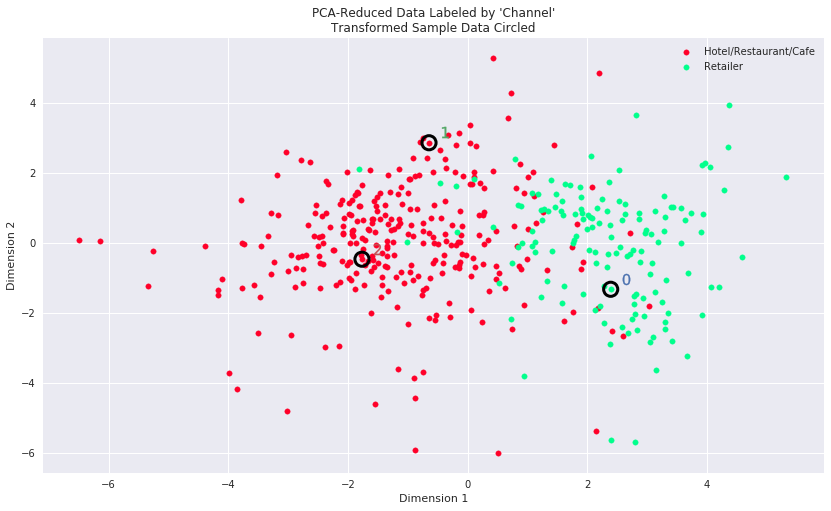

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

I'm pleased to see that my two chosen clusters match very closely with these two channels. For the most part Cluster 0 corresponds with Hotel/Restaurant/Cafe, and Cluster 1 corresponds with Retailer. There are a handful of HoReCa outliers that expand into Cluster 1 that were missed by my model, and vice versa.

This is pretty consistent with my guesses at classification -- I predicted Cluster 0 to be restaurants, and Cluster 1 to be markets or groceries. I didn't quite nail down cafes, though.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.